<a href="https://colab.research.google.com/github/soconzan/2024-2-dl/blob/main/cnn_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

### 학습 데이터 로드 및 데이터 전처리

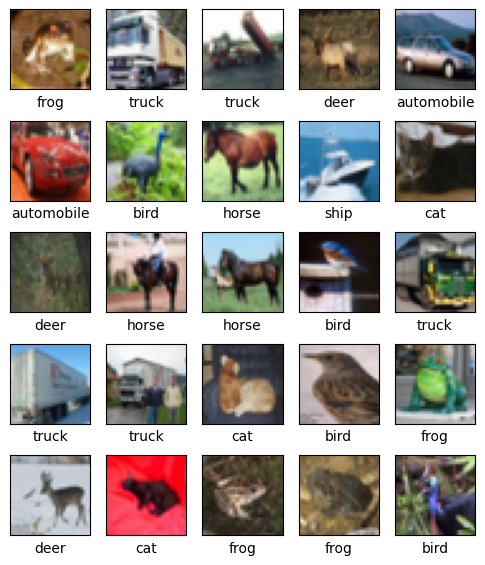

In [31]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10 클래스 레이블
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 이미지 9개 시각화
plt.figure(figsize=(6,7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# 데이터 전처리 - 이미지 데이터 정규화 (0~255 범위의 값을 0~1로 변경)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 라벨을 One-hot 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 모델-1

In [5]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint

# ResNet50 모델 로드 (Imagenet 사전학습 가중치 사용, Fully connected layer 제외)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 새로운 레이어 추가
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())  # GlobalAveragePooling으로 차원 축소
model.add(layers.Dense(512, activation='relu'))  # Fully connected layer 추가
model.add(layers.Dense(10, activation='softmax'))  # CIFAR-10에 맞는 10개 클래스 분류

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 최적 가중치 저장 콜백 설정
checkpoint = ModelCheckpoint('best_resnet50_cifar10_model.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

# 모델 학습 (저장 콜백 포함)
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint])

# 모델 저장
model.save('resnet50_cifar10_model.keras')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 80ms/step - accuracy: 0.5051 - loss: 1.5617 - val_accuracy: 0.2607 - val_loss: 2.8280
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 45ms/step - accuracy: 0.7137 - loss: 0.8582 - val_accuracy: 0.4138 - val_loss: 1.9410
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7126 - loss: 0.8428 - val_accuracy: 0.7026 - val_loss: 0.8417
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.7400 - loss: 0.7621 - val_accuracy: 0.5846 - val_loss: 1.3666
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.7405 - loss: 0.7675 - val_accuracy: 0.7106 - val_loss: 0.8750
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.8124 - loss: 0.5581 - val_accuracy: 0.7639 - val_loss: 0.7074
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.8335 - loss: 0.4941 - val_accuracy: 0.6687 - val_loss: 1.0335
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.8052 - loss: 0.5899 -

Test Loss: 1.2236037254333496
Test Accuracy: 0.6722000241279602


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,819,552 (281.60 MB)

 Trainable params: 24,588,810 (93.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 49,177,622 (187.60 MB)

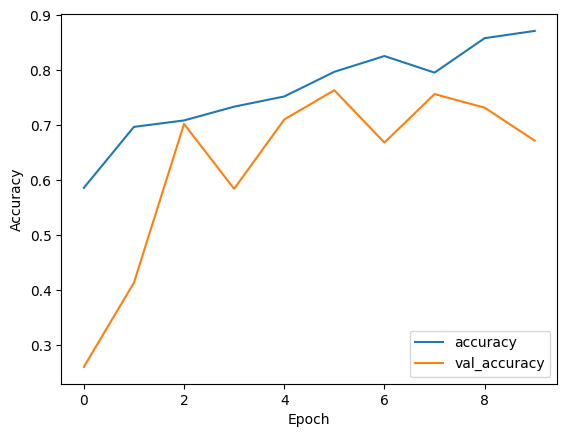

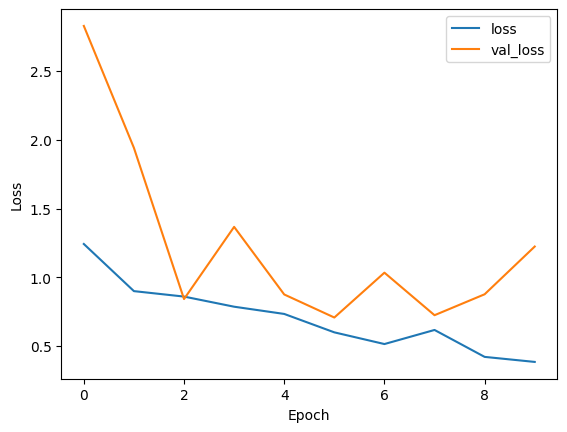

In [8]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)

# 예측
predictions = model.predict(x_test)

print("=================================")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print("=================================")

# 모델 구조 요약
model.summary()

# 학습 정확도 및 손실 시각화
import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# 손실 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# 테스트 데이터 중 첫 9개 이미지와 예측 결과 시각화
import numpy as np

plt.figure(figsize=(8,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])

    # 예측 레이블과 실제 레이블 가져오기
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])

    # 예측이 맞았는지 확인하여 레이블 색상 지정
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", color=color)
plt.show()

### 모델-2

In [10]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# ResNet50 모델 로드 (Imagenet 사전학습 가중치 사용, Fully connected layer 제외)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 새로운 레이어 추가
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())  # GlobalAveragePooling으로 차원 축소
model.add(layers.Dense(512, activation='relu'))  # Fully connected layer 추가
model.add(layers.Dropout(0.5))  # 드롭아웃 추가
model.add(layers.Dense(10, activation='softmax'))  # CIFAR-10에 맞는 10개 클래스 분류

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 최적 가중치 저장 콜백 설정
checkpoint = ModelCheckpoint('best_resnet50_cifar10_model2.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=2,
                               restore_best_weights=True)

# 모델 학습 (저장 콜백 포함)
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint, early_stopping])

# 모델 저장
model.save('resnet50_cifar10_model2.keras')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 82ms/step - accuracy: 0.4421 - loss: 1.8420 - val_accuracy: 0.3336 - val_loss: 2.3464
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.6575 - loss: 1.0242 - val_accuracy: 0.6415 - val_loss: 1.0242
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.6514 - loss: 1.0272 - val_accuracy: 0.5468 - val_loss: 1.3905
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.6816 - loss: 0.9361 - val_accuracy: 0.5426 - val_loss: 1.4043


Test Loss: 1.0242338180541992
Test Accuracy: 0.6414999961853027


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,819,552 (281.60 MB)

 Trainable params: 24,588,810 (93.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 49,177,622 (187.60 MB)

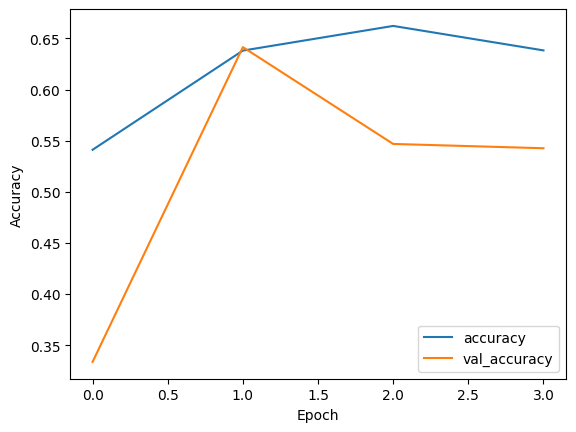

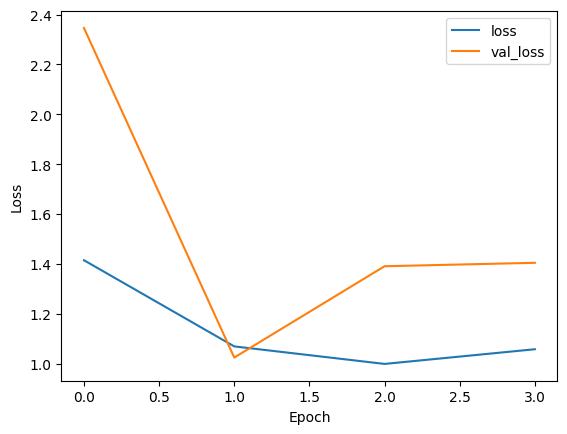

In [13]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)

# 예측
predictions = model.predict(x_test)

print("=================================")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print("=================================")

# 모델 구조 요약
model.summary()

# 학습 정확도 및 손실 시각화
import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# 손실 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# 테스트 데이터 중 첫 9개 이미지와 예측 결과 시각화
import numpy as np

plt.figure(figsize=(8,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])

    # 예측 레이블과 실제 레이블 가져오기
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])

    # 예측이 맞았는지 확인하여 레이블 색상 지정
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", color=color)
plt.show()

### 모델-3

In [14]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

# ResNet50 모델 로드 (Imagenet 사전학습 가중치 사용, Fully connected layer 제외)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 새로운 레이어 추가
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())  # GlobalAveragePooling으로 차원 축소
model.add(layers.Dense(512, activation='relu'))  # Fully connected layer 추가
model.add(layers.Dense(10, activation='softmax'))  # CIFAR-10에 맞는 10개 클래스 분류

# 모델 컴파일
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# 최적 가중치 저장 콜백 설정
checkpoint = ModelCheckpoint('best_resnet50_cifar10_model2.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True)

# 모델 학습 (저장 콜백 포함)
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint, early_stopping])

# 모델 저장
model.save('resnet50_cifar10_model2.keras')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 68ms/step - accuracy: 0.3904 - loss: 1.7786 - val_accuracy: 0.1467 - val_loss: 4.7102
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - accuracy: 0.6762 - loss: 0.9406 - val_accuracy: 0.5563 - val_loss: 1.4345
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 50ms/step - accuracy: 0.7299 - loss: 0.7962 - val_accuracy: 0.6302 - val_loss: 1.1504
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.7943 - loss: 0.6058 - val_accuracy: 0.6843 - val_loss: 0.9597
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.8273 - loss: 0.4953 - val_accuracy: 0.6700 - val_loss: 1.0193
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8648 - loss: 0.3980 - val_accuracy: 0.7295 - val_loss: 0.9066
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8850 - loss: 0.3304 - val_accuracy: 0.6912 - val_loss: 1.0791
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.9089 - loss: 0.2628 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7337 - loss: 0.9080
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step
Test Loss: 0.9066066145896912
Test Accuracy: 0.7294999957084656


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,230,742 (187.80 MB)

 Trainable params: 24,588,810 (93.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 24,588,812 (93.80 MB)

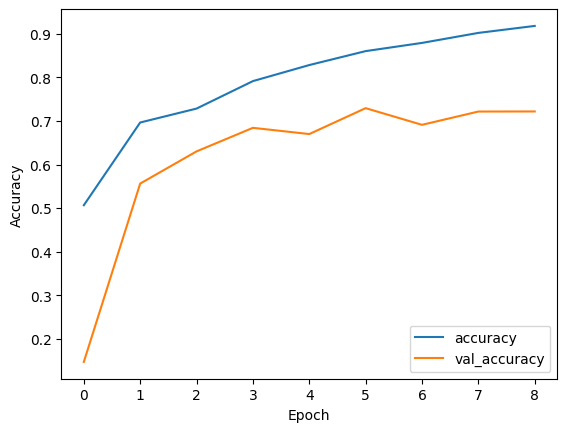

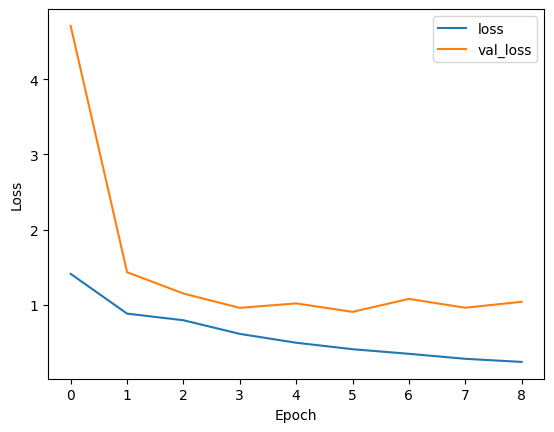

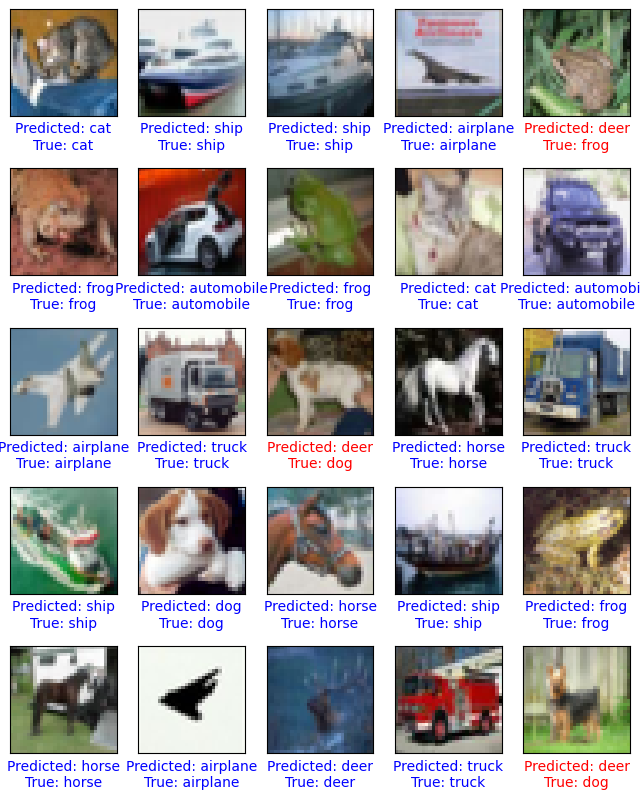

In [15]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)

# 예측
predictions = model.predict(x_test)

print("=================================")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print("=================================")

# 모델 구조 요약
model.summary()

# 학습 정확도 및 손실 시각화
import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# 손실 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# 테스트 데이터 중 첫 9개 이미지와 예측 결과 시각화
import numpy as np

plt.figure(figsize=(8,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])

    # 예측 레이블과 실제 레이블 가져오기
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])

    # 예측이 맞았는지 확인하여 레이블 색상 지정
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", color=color)
plt.show()

### 데이터 증강

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(x_train)

### 모델-3 재학습

In [17]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

# ResNet50 모델 로드 (Imagenet 사전학습 가중치 사용, Fully connected layer 제외)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 새로운 레이어 추가
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())  # GlobalAveragePooling으로 차원 축소
model.add(layers.Dense(512, activation='relu'))  # Fully connected layer 추가
model.add(layers.Dense(10, activation='softmax'))  # CIFAR-10에 맞는 10개 클래스 분류

# 모델 컴파일
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# 최적 가중치 저장 콜백 설정
checkpoint = ModelCheckpoint('best_resnet50_cifar10_model3.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True)

# 모델 학습 (저장 콜백 포함)
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint, early_stopping])

# 모델 저장
model.save('resnet50_cifar10_model3.keras')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 75ms/step - accuracy: 0.4207 - loss: 1.7211 - val_accuracy: 0.2295 - val_loss: 2.3888
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7008 - loss: 0.8855 - val_accuracy: 0.4830 - val_loss: 1.7318
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.7630 - loss: 0.6964 - val_accuracy: 0.7256 - val_loss: 0.8244
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.8162 - loss: 0.5402 - val_accuracy: 0.6108 - val_loss: 1.2901
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.8546 - loss: 0.4276 - val_accuracy: 0.7119 - val_loss: 0.8998
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 57ms/step - accuracy: 0.8573 - loss: 0.4346 - val_accuracy: 0.7355 - val_loss: 0.8929


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7262 - loss: 0.8222
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step
Test Loss: 0.8244122266769409
Test Accuracy: 0.725600004196167


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,230,742 (187.80 MB)

 Trainable params: 24,588,810 (93.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 24,588,812 (93.80 MB)

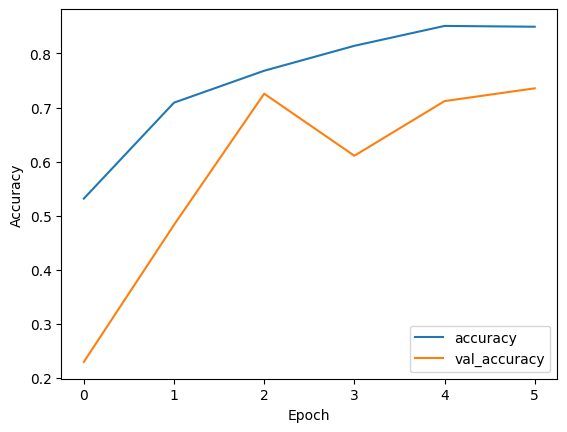

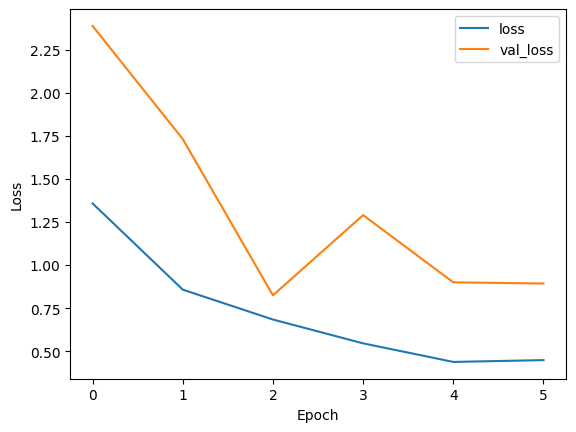

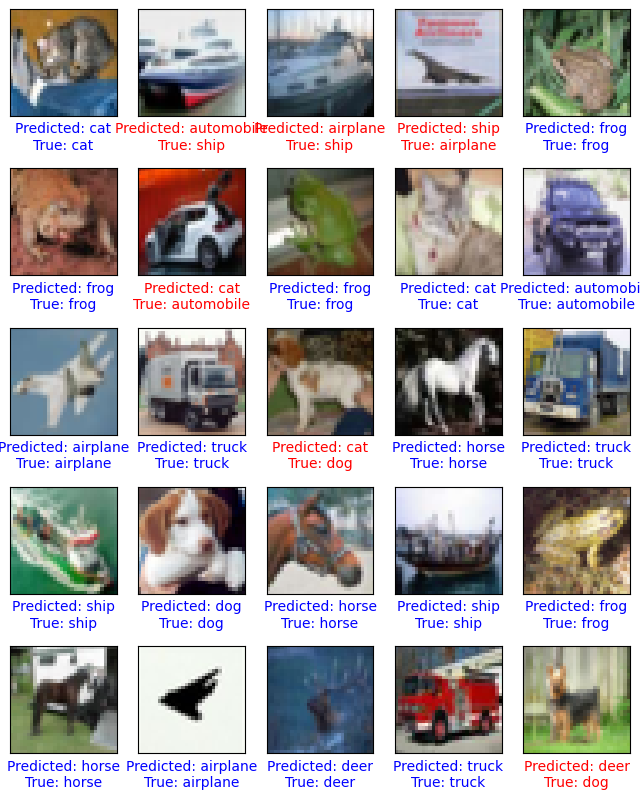

In [18]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)

# 예측
predictions = model.predict(x_test)

print("=================================")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print("=================================")

# 모델 구조 요약
model.summary()

# 학습 정확도 및 손실 시각화
import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# 손실 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# 테스트 데이터 중 첫 9개 이미지와 예측 결과 시각화
import numpy as np

plt.figure(figsize=(8,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])

    # 예측 레이블과 실제 레이블 가져오기
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])

    # 예측이 맞았는지 확인하여 레이블 색상 지정
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", color=color)
plt.show()

### 모델-4

In [37]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import SGD

# ResNet50 모델 로드 (Imagenet 사전학습 가중치 사용, Fully connected layer 제외)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 새로운 레이어 추가
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 학습률 스케줄링 함수 정의
def lr_schedule(epoch, lr):
    if epoch > 5:
        return lr * 0.5  # 에포크 5 이후 학습률을 절반으로 줄임
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# 모델 컴파일
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 최적 가중치 저장 콜백 설정
checkpoint = ModelCheckpoint('best_resnet50_cifar10_model4.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True)

# 모델 학습 (저장 콜백 및 학습률 스케줄링 포함)
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint, lr_scheduler])

# 모델 저장
model.save('resnet50_cifar10_model4.keras')

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 133ms/step - accuracy: 0.4246 - loss: 1.7063 - val_accuracy: 0.1685 - val_loss: 3.5508 - learning_rate: 0.0100
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 119ms/step - accuracy: 0.6919 - loss: 0.8993 - val_accuracy: 0.4538 - val_loss: 1.9790 - learning_rate: 0.0100
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 112ms/step - accuracy: 0.7443 - loss: 0.7610 - val_accuracy: 0.6162 - val_loss: 1.1957 - learning_rate: 0.0100
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.8099 - loss: 0.5618 - val_accuracy: 0.6646 - val_loss: 1.1292 - learning_rate: 0.0100
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 117ms/step - accuracy: 0.8315 - loss: 0.4994 - val_accuracy: 0.6722 - val_loss: 1.2098 - learning_rate: 0.0100
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.8716 - loss: 0.3800 - val_accuracy: 0.7001 - val_loss: 1.0847 - learning_rate: 0.0100
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 115ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.8246 - loss: 0.8741
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step
Test Loss: 0.8534825444221497
Test Accuracy: 0.824999988079071


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,230,742 (187.80 MB)

 Trainable params: 24,588,810 (93.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 24,588,812 (93.80 MB)

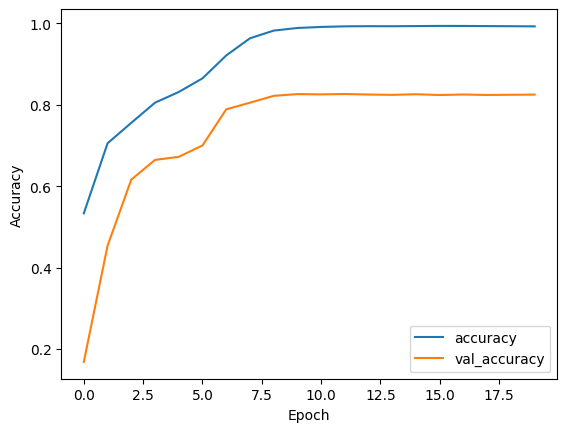

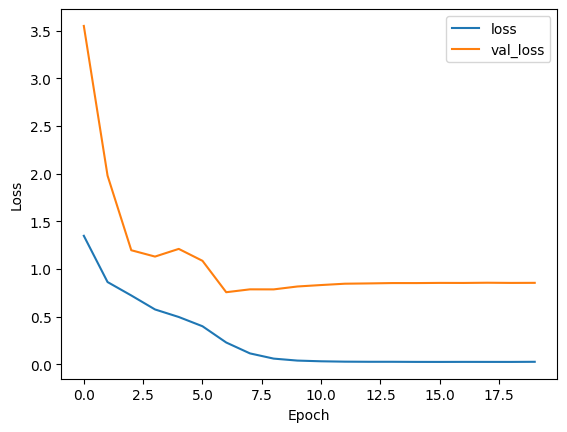

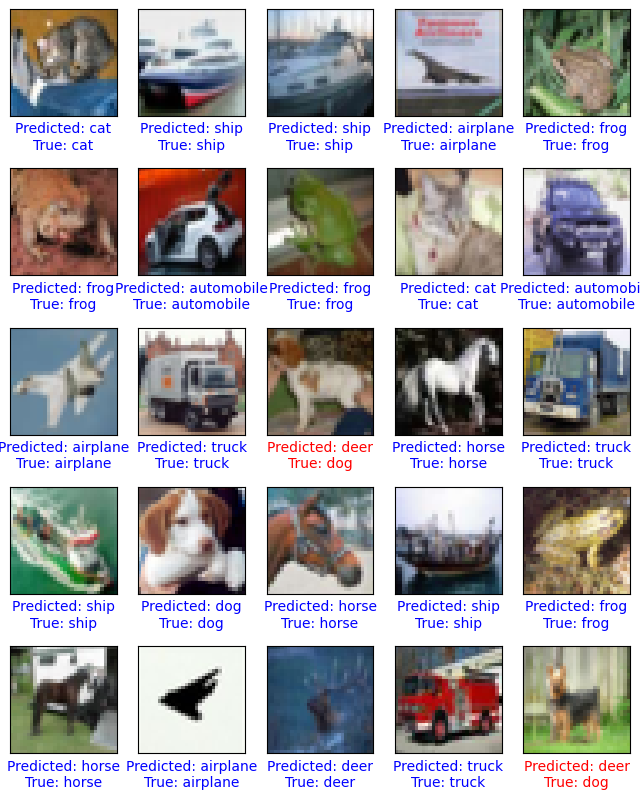

In [38]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)

# 예측
predictions = model.predict(x_test)

print("=================================")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print("=================================")

# 모델 구조 요약
model.summary()

# 학습 정확도 및 손실 시각화
import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# 손실 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# 테스트 데이터 중 첫 9개 이미지와 예측 결과 시각화
import numpy as np

plt.figure(figsize=(8,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])

    # 예측 레이블과 실제 레이블 가져오기
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])

    # 예측이 맞았는지 확인하여 레이블 색상 지정
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", color=color)
plt.show()